<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/Part_2_11_Custom_Training_Loops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 2: Define a simple model
def build_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10)
    ])
    return model

In [4]:
# Step 3: Training function using custom training loop
def custom_training_loop(model, x_train, y_train, x_test, y_test, epochs=5, batch_size=64):
    optimizer = tf.keras.optimizers.Adam()
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)
    test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

    train_losses, test_losses = [], []

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        # Training
        epoch_train_loss = 0.0
        for x_batch, y_batch in train_dataset:
            with tf.GradientTape() as tape:
                logits = model(x_batch, training=True)
                loss_value = loss_fn(y_batch, logits)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            train_acc_metric.update_state(y_batch, logits)
            epoch_train_loss += loss_value.numpy()

        train_loss = epoch_train_loss / len(train_dataset)
        train_acc = train_acc_metric.result().numpy()
        train_acc_metric.reset_state()

        # Testing
        epoch_test_loss = 0.0
        for x_batch_test, y_batch_test in test_dataset:
            test_logits = model(x_batch_test, training=False)
            t_loss = loss_fn(y_batch_test, test_logits)
            test_acc_metric.update_state(y_batch_test, test_logits)
            epoch_test_loss += t_loss.numpy()

        val_loss = epoch_test_loss / len(test_dataset)
        val_acc = test_acc_metric.result().numpy()
        test_acc_metric.reset_state()

        train_losses.append(train_loss)
        test_losses.append(val_loss)

        print(f"Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.4f} - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f}")

    return train_losses, test_losses

In [5]:
# Step 4: Run
model = build_model()
train_losses, test_losses = custom_training_loop(model, x_train, y_train, x_test, y_test)

Epoch 1/5
Train Loss: 0.4866 - Train Acc: 0.8272 - Val Loss: 0.4175 - Val Acc: 0.8512
Epoch 2/5
Train Loss: 0.3605 - Train Acc: 0.8680 - Val Loss: 0.3771 - Val Acc: 0.8618
Epoch 3/5
Train Loss: 0.3250 - Train Acc: 0.8808 - Val Loss: 0.3611 - Val Acc: 0.8670
Epoch 4/5
Train Loss: 0.3007 - Train Acc: 0.8888 - Val Loss: 0.3624 - Val Acc: 0.8701
Epoch 5/5
Train Loss: 0.2836 - Train Acc: 0.8939 - Val Loss: 0.3446 - Val Acc: 0.8753


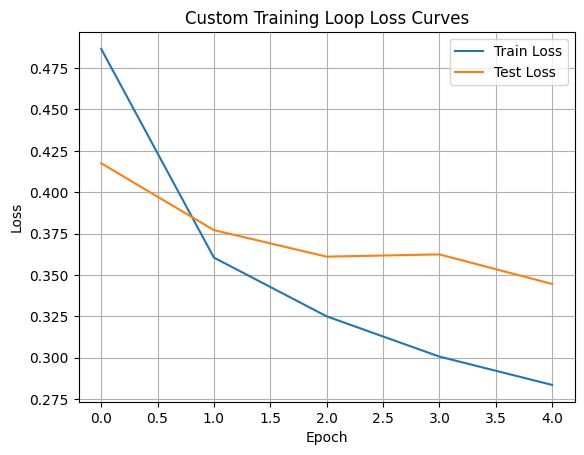

In [6]:
# Step 5: Plot
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title("Custom Training Loop Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
